# Test ACS intracompartmental pressure model using data from sheet


## Generate predicted pressure

Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Test model using CSV data sheet

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Load the TensorFlow Lite model
model_path = '/content/drive/My Drive/SEF 2023-2024/TinyML/model.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Load data from a CSV file
csv_path = '/content/drive/MyDrive/SEF 2023-2024/TinyML/fsr_data.csv'
data = pd.read_csv(csv_path)

# Create an empty list to store predicted values
predicted_values = []

for index, row in data.iterrows():
    input_features = row[['fsr_1', 'fsr_2', 'fsr_3', 'fsr_4', 'fsr_5', 'fsr_6', 'gyro']].values.astype(np.float32)

    # Set input tensor
    input_details = interpreter.get_input_details()
    interpreter.set_tensor(input_details[0]['index'], input_features.reshape(1, -1))

    # Run inference
    interpreter.invoke()

    # Get output tensor
    output_details = interpreter.get_output_details()
    output_data = interpreter.get_tensor(output_details[0]['index']).flatten()  # Flatten the output_data

    # Append the flattened predicted value to the list
    predicted_values.append(output_data)

# Convert the list to a numpy array for easier manipulation
predicted_values = np.array(predicted_values)
print("Predicted values generated.")

Predicted values generated.


Print all output data if needed

In [4]:
for index, row in data.iterrows():
    # Process the output data as needed
    print(f"Row {index + 1} - Input Data: {input_features}")
    print(f"Row {index + 1} - Output Data: {output_data}")
    print("=" * 50)

# Print all predicted values in array
print("All Predicted Values:")
print(predicted_values)

Row 1 - Input Data: [28.3 27.4 28.2 25.1 26.5 28.9  0. ]
Row 1 - Output Data: [22.112144]
Row 2 - Input Data: [28.3 27.4 28.2 25.1 26.5 28.9  0. ]
Row 2 - Output Data: [22.112144]
Row 3 - Input Data: [28.3 27.4 28.2 25.1 26.5 28.9  0. ]
Row 3 - Output Data: [22.112144]
Row 4 - Input Data: [28.3 27.4 28.2 25.1 26.5 28.9  0. ]
Row 4 - Output Data: [22.112144]
Row 5 - Input Data: [28.3 27.4 28.2 25.1 26.5 28.9  0. ]
Row 5 - Output Data: [22.112144]
Row 6 - Input Data: [28.3 27.4 28.2 25.1 26.5 28.9  0. ]
Row 6 - Output Data: [22.112144]
Row 7 - Input Data: [28.3 27.4 28.2 25.1 26.5 28.9  0. ]
Row 7 - Output Data: [22.112144]
Row 8 - Input Data: [28.3 27.4 28.2 25.1 26.5 28.9  0. ]
Row 8 - Output Data: [22.112144]
Row 9 - Input Data: [28.3 27.4 28.2 25.1 26.5 28.9  0. ]
Row 9 - Output Data: [22.112144]
Row 10 - Input Data: [28.3 27.4 28.2 25.1 26.5 28.9  0. ]
Row 10 - Output Data: [22.112144]
Row 11 - Input Data: [28.3 27.4 28.2 25.1 26.5 28.9  0. ]
Row 11 - Output Data: [22.112144]
Row 12

## Generate confusion matrix and related performance metrics

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix

threshold = 30

# Convert ground truth to binary labels (1 if disease, 0 if no disease)
ground_truth_labels = (data['ground_truth'] > threshold).astype(int)

# Convert predicted values to binary labels (1 if predicted disease, 0 if predicted no disease)
predicted_labels = (predicted_values > threshold).astype(int)

# Calculate accuracy using sklearn's accuracy_score
accuracy = accuracy_score(ground_truth_labels, predicted_labels)

# Calculate confusion matrix
conf_matrix = confusion_matrix(ground_truth_labels, predicted_labels)
print("\nConfusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate sensitivity (recall), specificity, precision, and F1 score
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0  # Check for division by zero
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0  # Check for division by zero
precision = tp / (tp + fp) if (tp + fp) != 0 else 0  # Check for division by zero
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0  # Check for division by zero

print(f"\nAccuracy: {accuracy}")
print(f"Sensitivity (Recall): {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score}")


Confusion Matrix:
[[80  0]
 [19  0]]

Accuracy: 0.8080808080808081
Sensitivity (Recall): 0.0
Specificity: 1.0
Precision: 0
F1 Score: 0


## Visualize Data

In [6]:
pip install matplotlib seaborn

Visualize Confusion Matrix (heat map)

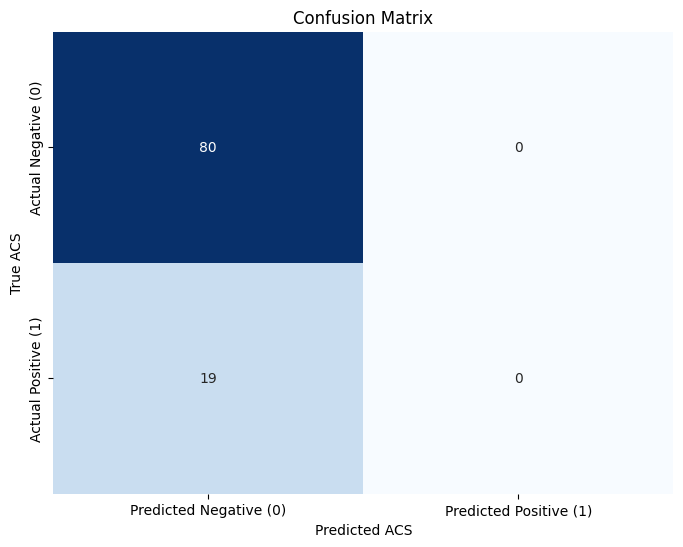

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['Actual Negative (0)', 'Actual Positive (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted ACS')
plt.ylabel('True ACS')
plt.show()

Visualize Metrics (bar chart)

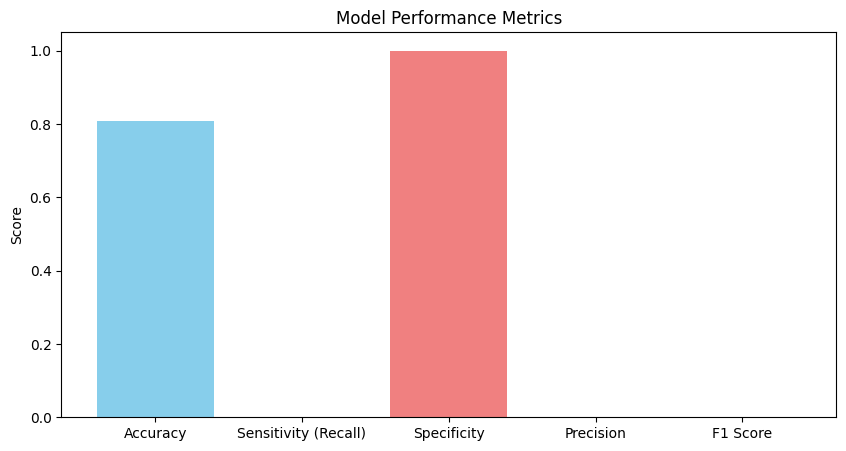

In [8]:
metrics_names = ['Accuracy', 'Sensitivity (Recall)', 'Specificity', 'Precision', 'F1 Score']
metrics_values = [accuracy, sensitivity, specificity, precision, f1_score]

plt.figure(figsize=(10, 5)) # Higher = better
plt.bar(metrics_names, metrics_values, color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'orchid']) # Can select other colors
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.show()